<a href="https://colab.research.google.com/github/Hadi-Saghir/Deep-Learning-Notebooks/blob/main/Lab_4_(2_3)_5TF078_Hadi_Saghir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab 4: Laboration tal- och textigenkänning**
## Author: Hadi Saghir (hasa0182)

This lab will demonstrate knowledge and ability to apply a recurrent neural network (RNN) model to make prediction on time series.

This document will contain following parts:
- Embedding (1/3)
- IMDB reviews (2/3)
- BERT (3/3)

#IMDB Reviews

This section will be applying ML processes to develop a sentiment detection for movie reviews. The processes being utilizied are the following:

- Importing the IMDB Dataset (preprocessed and embedded)

- Split the dataset into training, validation, and test sets.

- Train a machine learning model on the following models, SimpleRNN(32), LSTM(32), a larger LSTM tex LSTM(128), and a bidirectional LSTM BiLSTM(32).

- Evaluate the model's performance on the validation set and use it to adjust the model's hyperparameters.

- Test the model's performance on the test set.

- Analyze the result of the different models.


##Importing IMDB Dataset

In [ ]:
import keras
keras.__version__

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

In [ ]:
from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17464789/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


##Training our models

###SimpleRNN(32)

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 22s 129ms/step - loss: 0.6334 - acc: 0.6291 - val_loss: 0.6664 - val_acc: 0.6474
Epoch 2/10
157/157 [==============================] - 19s 121ms/step - loss: 0.3926 - acc: 0.8295 - val_loss: 0.3609 - val_acc: 0.8526
Epoch 3/10
157/157 [==============================] - 18s 116ms/step - loss: 0.2929 - acc: 0.8848 - val_loss: 0.3771 - val_acc: 0.8346
Epoch 4/10
157/157 [==============================] - 18s 116ms/step - loss: 0.2425 - acc: 0.9065 - val_loss: 0.3377 - val_acc: 0.8730
Epoch 5/10
157/157 [==============================] - 18s 118ms/step - loss: 0.1675 - acc: 0.9390 - val_loss: 0.5301 - val_acc: 0.7622
Epoch 6/10
157/157 [==============================] - 18s 117ms/step - loss: 0.1304 - acc: 0.9541 - val_loss: 0.4104 - val_acc: 0.8626
Epoch 7/10
157/157 [==============================] - 18s 117ms/step - loss: 0.0900 - acc: 0.9700 - val_loss: 0.5424 - val_acc: 0.7944
Epoch 8/10
157/157 [==============================] - 1

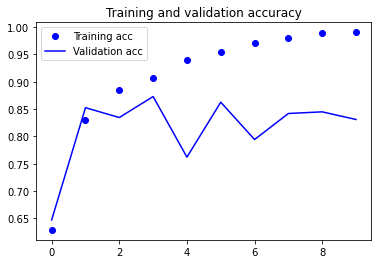

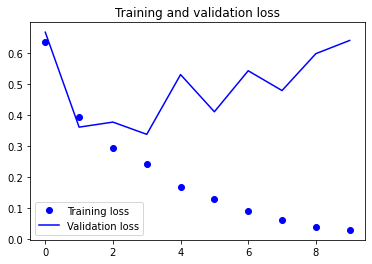

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

This training session tells us that the model's accuracy improved over the course of the 10 training epochs. The training accuracy (acc) increases from 0.6291 in the first epoch to 0.9906 in the last epoch. The validation accuracy (val_acc) also increases, but not as much as the training accuracy, which indicates that the model is overfitting to the training data. The loss (loss) decreases over the course of training, which indicates that the model is learning. However, the validation loss (val_loss) does not decrease as much as the training loss, which also indicates overfitting. Early stopping could be used to prevent the overfitting seen after epoch 5, but that will be implemented in LSTM(Mine).


A SimpleRNN may not be the best choice as it has a tendency to suffer from the vanishing gradient problem, which makes them less effective at handling longer sequences of data such as movie reviews. Other architectures such as LSTM and GRU are better suited for handling longer sequences of data and are often used in sentiment analysis tasks.

###LSTM(32)

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 10s 23ms/step - loss: 0.4862 - acc: 0.7757 - val_loss: 0.3829 - val_acc: 0.8408
Epoch 2/10
157/157 [==============================] - 3s 22ms/step - loss: 0.2843 - acc: 0.8893 - val_loss: 0.3928 - val_acc: 0.8322
Epoch 3/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2392 - acc: 0.9122 - val_loss: 0.6438 - val_acc: 0.7860
Epoch 4/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1983 - acc: 0.9280 - val_loss: 0.2841 - val_acc: 0.8920
Epoch 5/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1746 - acc: 0.9372 - val_loss: 0.3327 - val_acc: 0.8876
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1608 - acc: 0.9419 - val_loss: 0.3156 - val_acc: 0.8884
Epoch 7/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1429 - acc: 0.9488 - val_loss: 0.3578 - val_acc: 0.8882
Epoch 8/10
157/157 [==============================] - 5s 35ms/step -

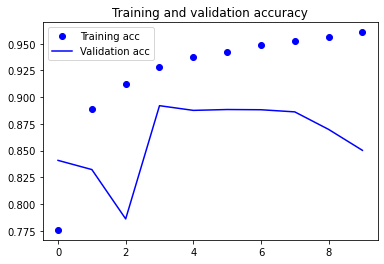

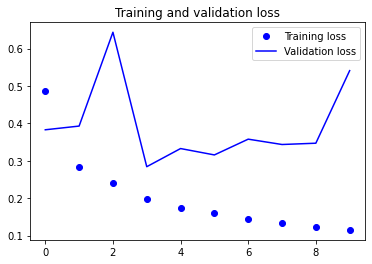

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The training loss is decreasing, and the training accuracy is increasing, indicating that the model is becoming better at classifying the reviews.  However, it is also apparent that there may be overfitting, as the validation loss and accuracy are not improving as much as the training loss and accuracy. This model is generalizing better to unseen data as suggested by the validation loss and accuracy decreasing and increasing respectively.

I will try using a larger network and using techniques like regularization to prevent overfitting (even more than what we are currently exhibiting). Ultimately, it's a trade off between performance and computational resources.

###LSTM(Mine)

The regaulization methods i want to test out are the following:

- Dropout: This is a form of regularization where a certain percentage of neurons in the LSTM layer are randomly dropped out during training. This helps to prevent overfitting by reducing the complexity of the model.

- L1 and L2 Regularization: These are forms of weight regularization, where a penalty term is added to the loss function to discourage the model from assigning too much importance to any one weight.

- Early Stopping: This is a form of regularization that stops the training of the model when the performance on the validation set stops improving.

However, according to the lab description i should use early stopping.

In [ ]:
from keras.layers import LSTM
from keras.callbacks import EarlyStopping


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

es=EarlyStopping(monitor='val_loss', verbose=1, patience=3, mode='auto', min_delta=0, restore_best_weights = True)
callbacks =[es]


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks
                    )

Epoch 1/10
157/157 [==============================] - 7s 31ms/step - loss: 0.5298 - acc: 0.7517 - val_loss: 0.4245 - val_acc: 0.8136
Epoch 2/10
157/157 [==============================] - 4s 28ms/step - loss: 0.3063 - acc: 0.8773 - val_loss: 0.3273 - val_acc: 0.8626
Epoch 3/10
157/157 [==============================] - 5s 34ms/step - loss: 0.2495 - acc: 0.9055 - val_loss: 0.3678 - val_acc: 0.8346
Epoch 4/10
157/157 [==============================] - 5s 33ms/step - loss: 0.2164 - acc: 0.9201 - val_loss: 0.3109 - val_acc: 0.8806
Epoch 5/10
157/157 [==============================] - 6s 36ms/step - loss: 0.1886 - acc: 0.9330 - val_loss: 0.5272 - val_acc: 0.8246
Epoch 6/10
157/157 [==============================] - 4s 28ms/step - loss: 0.1683 - acc: 0.9393 - val_loss: 0.5992 - val_acc: 0.7666
Epoch 7/10
157/157 [==============================] - 4s 28ms/step - loss: 0.1609 - acc: 0.9423 - val_loss: 0.3281 - val_acc: 0.8588
Epoch 7: early stopping



LSTM(128)

The models early stops at epoch 10, resorting best weight at epoch 7. The training loss decreased from 0.5474 in the first epoch to 0.1260 in the 7th epoch, and the training accuracy increased from 0.7370 in the first epoch to 0.9563 in the 7th epoch. The validation loss decreased from 0.4066 in the first epoch to 0.3115 in the 7th epoch, and the validation accuracy increased from 0.8190 in the first epoch to 0.8704 in the 7th epoch.After epoch 7, the model starts to overfit to a greater extent at a higher rate.  

LSTM(64)

The models early stops at epoch 6,  resorting best weight at epoch 7. The training loss decreased from 0.5496 in the first epoch to 0.2559 in the 3rd epoch, and the training accuracy increased from 0.7348 in the first epoch to 0.9006 in the 3rd epoch. The validation loss decreased from 0.4074 in the first epoch to 0.2810 in the 3rd epoch, and the validation accuracy increased from 0.8294 in the first epoch to 0.882 in the 3rd epoch. The resuylt of the performance of LSTM(128) was higher in training loss, training accuracy and val_loss but not val_acc. This may suggest LSTM is better at learning new, but higher cross-validation suggests may be exhibiting more overfitting. This causes the model read better new data.


LSTM(64) performed better, seeing that overfitting is already a problem, increasing the size doesn't help. However, the results aren't very consistent, so different run may experience varying results.


#### **Own Testing**
* LSTM(64)/LSTM(128)
* Dropout(0.5)

Overfitting still apparent training results improved while the validation results are rather stagnant.The model achieved an accuracy of 96.13% on the training set and 86.98% on the validation set after 10 epochs. The loss on the training set decreased while the loss on the validation set increased over the 10 epochs, indicating that the model may be overfitting.

* LSTM(16)

meh. nothing interesting

###LSTM BiLSTM(32)

A bidirectional LSTM (BLSTM) is a type of LSTM that processes the input sequence in two directions, one direction from past to future and the other direction from future to past. This allows the network to capture both past and future context, which can be useful for tasks such as language modeling or sentiment detection. A normal LSTM, on the other hand, only processes the input sequence in one direction, from past to future, which limits its ability to capture context from the future. BLSTM can provide better performance in certain tasks because it can capture more context from the input sequence.

In [ ]:
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.callbacks import EarlyStopping


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

es=EarlyStopping(monitor='val_loss', verbose=1, patience=3, mode='auto', min_delta=0, restore_best_weights = True)
callbacks =[es]


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks
                    )

Epoch 1/10
157/157 [==============================] - 19s 50ms/step - loss: 0.5196 - acc: 0.7454 - val_loss: 0.4116 - val_acc: 0.8196
Epoch 2/10
157/157 [==============================] - 6s 38ms/step - loss: 0.3050 - acc: 0.8806 - val_loss: 0.3088 - val_acc: 0.8816
Epoch 3/10
157/157 [==============================] - 7s 47ms/step - loss: 0.2436 - acc: 0.9062 - val_loss: 0.4067 - val_acc: 0.8446
Epoch 4/10
157/157 [==============================] - 6s 40ms/step - loss: 0.2062 - acc: 0.9244 - val_loss: 0.3661 - val_acc: 0.8428
Epoch 5/10
157/157 [==============================] - 6s 39ms/step - loss: 0.1839 - acc: 0.9327 - val_loss: 0.2976 - val_acc: 0.8888
Epoch 6/10
157/157 [==============================] - 6s 38ms/step - loss: 0.1640 - acc: 0.9427 - val_loss: 0.3644 - val_acc: 0.8806
Epoch 7/10
157/157 [==============================] - 6s 38ms/step - loss: 0.1449 - acc: 0.9484 - val_loss: 0.3332 - val_acc: 0.8688
Epoch 8/10
157/157 [==============================] - 6s 38ms/step -

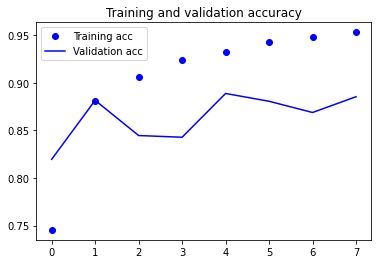

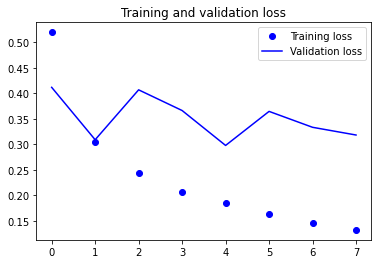

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The training and validation accuracy start off at 72.21% and 78.72% respectively, and improve over the course of the training, reaching 0.94 and 0.89 respectively at the end of the 7th epoch. The training loss starts off at 0.5663 and decreases over the course of the training, reaching 0.15, nbut the validation loss also decreases at first, reaching a minimum of 0.2993 at the 7th epoch, but then increases again to 0.3562 at the 10th epoch. This causes the model to early stop.

The performance is overall an improvement from LSTM(32). Compared to the previous lab, this caused a descra

##Analysis

A simpleRNN processes input data in a single direction, meaning it only takes into account previous inputs when making predictions. On the other hand, an LSTM is designed to overcome the limitations of simpleRNNs by introducing a "memory" cell, which can store information from previous inputs and selectively decide which information to keep or discard. This allows the LSTM to better handle sequential data and make more accurate predictions.

The

A bidirectional LSTM (biLSTM) is a variant of the LSTM that processes input data in both forward and backward directions. This allows the model to capture context from both past and future inputs, leading to even better performance on sequential data.

In terms of performance, a biLSTM typically performs better than a simpleRNN or LSTM on tasks such as natural language processing, speech recognition, and time series forecasting, as it can better capture the context and dependencies in the input data.

##Test

In [ ]:
from keras.preprocessing.text import Tokenizer


test_sentences = [
  "That movie was absolutely awful",
  "The acting was a bit lacking",
  "The film was creative and surprising",
  "Absolutely fantastic!",
  "This movie is not worth the money",
  "The only positive thing with this movie is the music"
]

y_test = [0, 0, 1, 1, 0, 0]


# Initialize the tokenizer
tokenizer = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
# Set up tokenizer based on IMDB wordlist
index_offset = 3
word_to_id = imdb.get_word_index()
word_to_id = {k: (v + index_offset) for k, v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
tokenizer.word_index = word_to_id

# Fit the tokenizer on the test sentences
tokenizer.fit_on_texts(test_sentences)

# Tokenize the test sentences
test_seq = tokenizer.texts_to_sequences(test_sentences)
print(test_seq)

[[7, 2, 3, 4, 8], [1, 9, 3, 10, 11, 12], [1, 13, 3, 14, 15, 16], [4, 17], [5, 2, 6, 18, 19, 1, 20], [1, 21, 22, 23, 24, 5, 2, 6, 1, 25]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Pad the sequences to the same length
from keras_preprocessing.sequence import pad_sequences
max_sequence_length = max([len(s.split()) for s in test_sentences])
test_sequences = pad_sequences(test_seq, maxlen=max_sequence_length)

# Test your model
predictions = model.predict(test_sequences)

# Print prediction
print(predictions)
print("Positive if pred > 0.5")
print()

# Convert the predictions to a binary format (i.e. 0 or 1)
predictions = [1 if pred > 0.5 else 0 for pred in predictions]

print("Labels:     ", y_test)
print("Prediction: ", predictions)
print()

# Calculate the evaluation metrics
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print the results
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1-Score: ", f1)

print()
print()

# Compare predictions with actual labels
for i, prediction in enumerate(predictions):
    print("Sentence: ", test_sentences[i])
    print("Prediction: ", prediction)
    print("Label: ", y_test[i])
    print()

1/1 [==============================] - 0s 16ms/step
[[0.5181259 ]
 [0.4150509 ]
 [0.32717445]
 [0.5624048 ]
 [0.32424414]
 [0.1916808 ]]
Positive if pred > 0.5

Labels:      [0, 0, 1, 1, 0, 0]
Prediction:  [1, 0, 0, 1, 0, 0]

Accuracy:  0.6666666666666666
Precision:  0.5
Recall:  0.5
F1-Score:  0.5


Sentence:  That movie was absolutely awful
Prediction:  1
Label:  0

Sentence:  The acting was a bit lacking
Prediction:  0
Label:  0

Sentence:  The film was creative and surprising
Prediction:  0
Label:  1

Sentence:  Absolutely fantastic!
Prediction:  1
Label:  1

Sentence:  This movie is not worth the money
Prediction:  0
Label:  0

Sentence:  The only positive thing with this movie is the music
Prediction:  0
Label:  0



# Conclusion


This result suggests that the model is not performing well. The accuracy is around 67%, meaning that 2 out of 6 predictions are incorrect, taking into consideration our models accuracy during validation (80%).


It seems the model does slightly understanding, but awful must be a token the model should have picked on, but it didn't, which is suprising. Did it pick up on "lacking" or was is just a fluke? I have rerun the test, but the results are more often than not very similar.


The model may not have picked up on the word awful, creative and suprisingm but rather picked up on noise such as "a bit" and "not" with negative connotations, while "absolute" with positive. Thinking of tokenization, the word is stripped to it's root form, "absolutely" could be reduced to "absolute". and Absolute could be assosiated with positive things such as seen in sentence 1 and 4.
